In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

In [67]:
ccr_ground = pd.read_csv("data/ccr_hourly_data.csv")
jla_ground = pd.read_csv("data/jla_hourly_data.csv")
tsz_ground = pd.read_csv("data/tsz_hourly_data.csv")
nrv_ground = pd.read_csv("data/nrv_hourly_data.csv")

In [68]:
ccr_pred = pd.read_csv("../../02_program_code/pf_nogs/timesteps_output_POFR_CCR-COL_DBG.csv").iloc[:-1]
jla_pred = pd.read_csv("../../02_program_code/pf_nogs/timesteps_output_POFR_JLA-JAK_DBG.csv").iloc[:-1]
tsz_pred = pd.read_csv("../../02_program_code/pf_nogs/timesteps_output_POFR_TSZ-SAN_DBG.csv").iloc[:-1]
nrv_pred = pd.read_csv("../../02_program_code/pf_nogs/timesteps_output_POFR_NRV-NEW_DBG.csv").iloc[:-1]

In [69]:
ccr_ground.columns

Index(['year', 'julian-day', 'standard-time', 'solar', 'rain', 'wind', 'T-air',
       'T-soil', 'D-MD', 'GW', 'E-MD', 'P-PD', 'P-MD', 'K-plant'],
      dtype='object')

In [70]:
ccr_pred.columns

Index(['year', 'julian-day', 'standard-time', 'solar', 'rain', 'wind', 'T-air',
       'T-soil', 'D-MD', 'P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P-PD', 'P-MD',
       'E-MD', 'GW', 'leaf-air-vpd', 'leaftemp', 'Anet-la', 'ci', 'PPFD',
       'S-P-MD', 'S-E-MD', 'S-GW', 'S-leaf-air-vpd', 'S-leaftempt',
       'S-Anet-la', 'S-ci', 'S-PPFD', 'S-E-tree', 'Anet-tree', 'Pcrit',
       'Ecrit', 'P-leaf', 'P-stem', 'P-root', 'K-stem', 'K-leaf', 'K-plant',
       'K-xylem', 'K-root-1', 'K-root-2', 'K-root-3', 'K-root-4', 'K-root-5',
       'K-root-all', 'E-root-1', 'E-root-2', 'E-root-3', 'E-root-4',
       'E-root-5', 'water-content', 'water-content-delta', 'end-rain',
       'end-ground-water', 'end-E', 'end-drainage', 'end-soil-evap', 'end-ET',
       'end-Anet-la', 'end-total-water-input', 'end-PLC-plant',
       'end-PLC-xylem', 'end-runoff'],
      dtype='object')

In [71]:
def cmp_pred_to_ground_metrics(columns, ground, pred, start, end):

    fit = {}

    for col in columns:

        col_ground = ground[ground['julian-day'].between(start, end)][col].dropna()
        col_pred = pred[col]

        col_pred = col_pred.loc[col_ground.index]
        
        mse = mean_squared_error(col_ground, col_pred)
        rmse = root_mean_squared_error(col_ground, col_pred)
        mape = mean_absolute_percentage_error(col_ground, col_pred)
        r2 = r2_score(col_ground, col_pred)

        fit[col] = {
            'mse' : mse,
            'rmse' : rmse,
            'mape' : mape,
            'r2' : r2
        }

        # Plot ground vs pred with fitted line and 1:1 correspondence
        plt.figure(figsize=(8, 6))
        plt.scatter(col_ground, col_pred, label='Data Points', alpha=0.7)
        plt.plot([col_ground.min(), col_ground.max()], [col_ground.min(), col_ground.max()], 'r--', label='1:1 Line')
        
        # Fit a line to the data
        fit_coeff = np.polyfit(col_ground, col_pred, 1)
        fit_line = np.poly1d(fit_coeff)
        plt.plot(col_ground, fit_line(col_ground), 'b-', label=f'Fitted Line: y={fit_coeff[0]:.2f}x+{fit_coeff[1]:.2f}')
        
        # Add metrics as text
        plt.text(0.05, 0.95, ''.join([f'{key}: {value:.2f}\n' for key, value in fit[col].items()]), 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
        
        plt.xlabel('Ground')
        plt.ylabel('Prediction')
        plt.title(f'Ground vs Prediction: {col}')
        plt.legend()
        plt.grid(True)
        plt.show()

    return fit

In [72]:
columns = ['P-PD', 'P-MD', 'GW', 'K-plant', 'E-MD']
predrought_cutoff = 236
start_day = 121

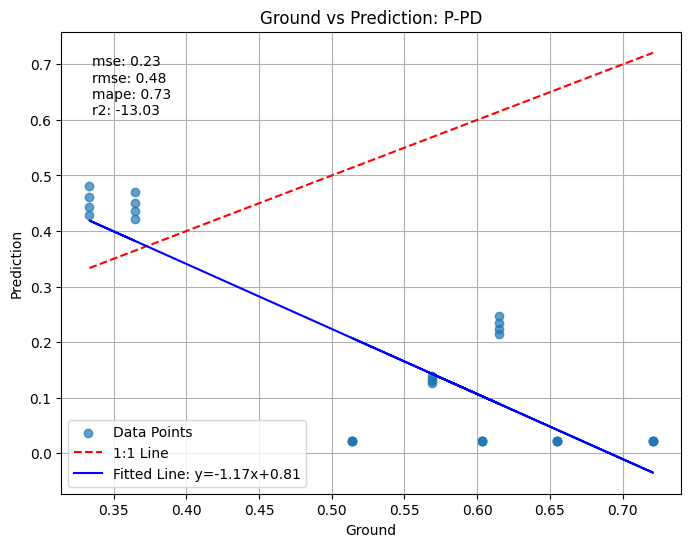

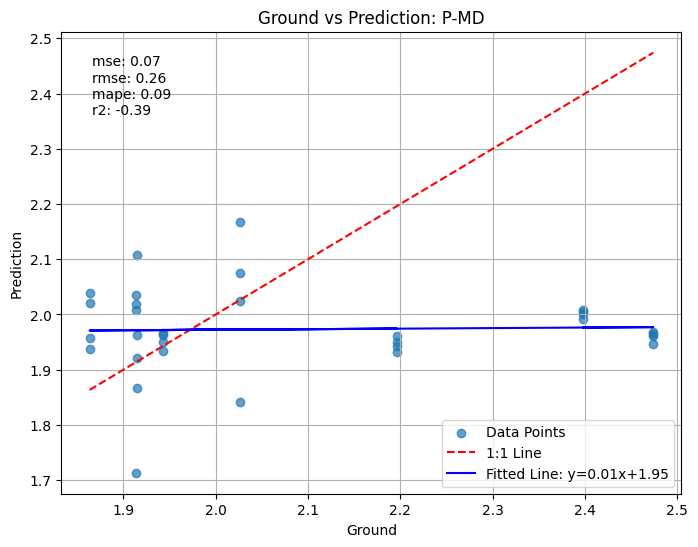

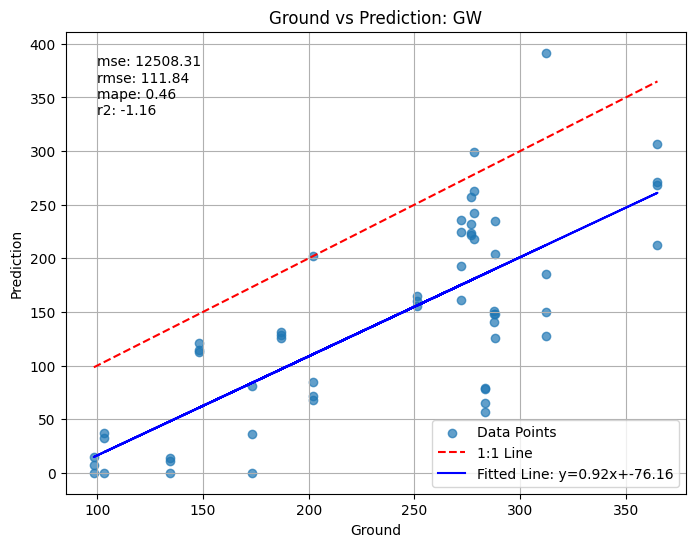

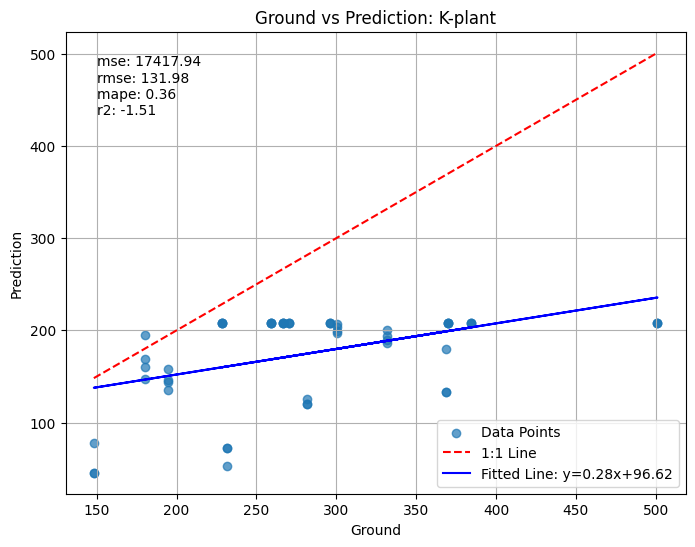

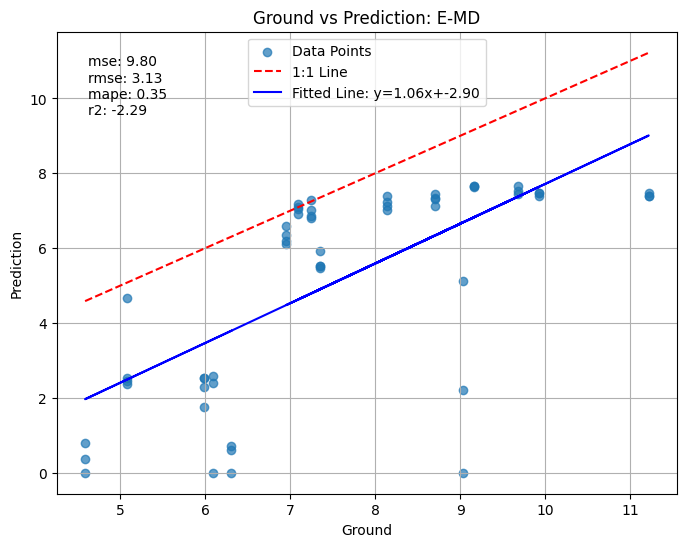

{'P-PD': {'mse': 0.2285355673572908,
  'rmse': 0.4780539377071282,
  'mape': 0.7287036439620047,
  'r2': -13.03241070350054},
 'P-MD': {'mse': 0.0680162123576365,
  'rmse': 0.26079918013221687,
  'mape': 0.0892810909871642,
  'r2': -0.3857176327018468},
 'GW': {'mse': 12508.30827128742,
  'rmse': 111.84054842179297,
  'mape': 0.46086477731872516,
  'r2': -1.158013461758134},
 'K-plant': {'mse': 17417.9407033767,
  'rmse': 131.97704612309178,
  'mape': 0.36443603747235903,
  'r2': -1.5114339958733423},
 'E-MD': {'mse': 9.80142291029979,
  'rmse': 3.1307224262619946,
  'mape': 0.3497741857889814,
  'r2': -2.2935856268039005}}

In [73]:
display(cmp_pred_to_ground_metrics(columns, ccr_ground, ccr_pred, start_day, predrought_cutoff))